In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Butcher_solver(f,t,x,h,A,b,c):
    Num_stages=len(c)
    m=len(x)
    k=np.zeros([Num_stages,m])
    k[0]=f(t,x)
    for i in range(1,Num_stages):
        Sum=np.zeros([m])
        for j in range(i):
            Sum=Sum+A[i][j]*k[j,:]
        k[i,:]=f(t+c[i]*h,x+h*Sum)    
    F=x+h*np.dot(b,k)
    return F

In [3]:
#Butcher Tables
A_Euler=np.array([0])
b_Euler=np.array([1])
c_Euler=np.array([0])

A_Heun=np.array([[0,0],[1,0]])
b_Heun=np.array([0.5,0.5])
c_Heun=np.array([0,1])

A_RK3=np.array([[0,0],[2.0/3,0]])
b_RK3=np.array([1.0/4,3.0/4])
c_RK3=np.array([0,2/3.0])

A_RK4=np.array([[0,0,0],[0.5,0,0],[0,0.5,0],[0,0,1]])
b_RK4=np.array([1/6.,1/3.,1/3.,1/6.])
c_RK4=np.array([0,1/2.,1/2.,1])

In [4]:
def two_body_problem(t,x):  # x is an array of 4 elems
    # Initialization for t=0, initial values
    y1,y2,y3,y4=x 
    # Initialization of the first derivatives in time with initial values according to equations given
    dxy1=y3 
    dxy2=y4
    dxy3=-y1/((y1**2+y2**2)**(3/2))
    dxy4=-y2/((y1**2+y2**2)**(3/2))
    return [dxy1,dxy2,dxy3,dxy4]

In [5]:
def Butcher_Stepper(f,t0,tf,y0,h,A,b,c):
    m=len(y0)
    n=int((tf-t0)/h)
    sol=np.zeros([n,m])
    sol[0]=y0
    for i in range(1,n):
        sol[i]=Butcher_solver(f,t0,sol[i-1],h,A,b,c)
    T=np.linspace(t0,tf,n)
    return sol,T

In [6]:
RK4_sol,T=Butcher_Stepper(two_body_problem,0,8,[0.5,0,0,np.sqrt(3)],0.1,A_Heun,b_Heun,c_Heun)

In [7]:
RK4_sol1,T1=Butcher_Stepper(two_body_problem,0,8,[0.5,0,0,np.sqrt(3)],0.01,A_Heun,b_Heun,c_Heun)

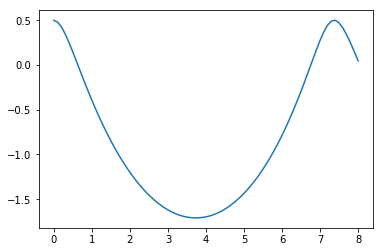

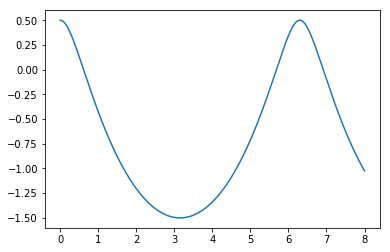

In [8]:
plt.plot(T,RK4_sol[:,0])
plt.show()
plt.plot(T1,RK4_sol1[:,0])
plt.show()

In [9]:
from scipy.integrate import odeint,RK23,solve_ivp

In [10]:
sol =solve_ivp(two_body_problem, [0, 8], [0.5,0,0,np.sqrt(3)], RK23)

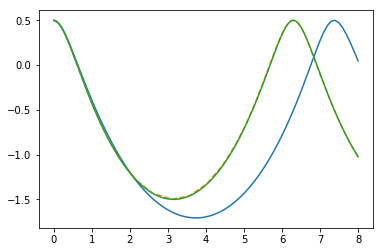

In [11]:
plt.plot(T,RK4_sol[:,0])
plt.plot(sol.t,sol.y[0],'--')
plt.plot(T1,RK4_sol1[:,0])
plt.show()

In [12]:
#RK45 is DOPRI5
#RK45??
#RK23 is not classic RK4
#RK23??

In [13]:
def Adaptive_Butcher(f,t,x,h,A,b,b_hat,c,p,Tol,Fs):
    Num_stages=len(c)
    m=len(x)
    k=np.zeros([Num_stages,m])
    k[0]=f(t,x)
    for i in range(1,Num_stages):
        Sum=np.zeros([m])
        for j in range(i):
            Sum=Sum+A[i][j]*k[j,:]
        k[i,:]=f(t+c[i]*h,x+h*Sum)
    F=x+h*np.dot(b,k)    
    l=abs(h*np.dot(b_hat-b,k))
    if l>Tol:
        h=Fs*h*(Tol/l)**(1/(p+1))
        return h,list(x),0
    else:
        h=Fs*h*(Tol/l)**(1/(p+1))
        return h,list(F),1

In [14]:
def Adaptive_Butcher_Stepper(f,t0,tf,y0,h,A,b,b_hat,c,p=2,Tol=1e-2,Fs=1):
    t=t0
    m=len(y0)
    sol=[y0]
    T=[t0]
    i=1
    while(t<tf):
        h,solt,s=Adaptive_Butcher(f,t,sol[i-1],h,A,b,b_hat,c,p,Tol,Fs)
        if s==1:
            sol=sol+[solt]
            t=t+h
            i=i+1
            T=T+[t]    
    return sol,T

In [15]:
A_DOPRI5=np.array([[0,0,0,0,0,0,0],[1/5,0,0,0,0,0,0],[3/40,9/40,0,0,0,0,0],[44/45,-56/15,32/9,0,0,0,0],[19372/6561,-25360/2187,64448/6561,-212/729,0,0,0],[9017/3168,-355/33,46732/5247,49/176,-5103/18656,0,0],[35/384.,0,500/1113,125/192,-2187/6784,11/84,0]])
b_DOPRI5=np.array([35/384.,0,500/1113,125/192,-2187/6784,11/84,0])
b_hat_DOPRI5=np.array([5179/57600,0,7571/16695,393/640,-92097/339200,187/2100,1/40])
c_DOPRI5=np.array([0,1/5.,3/10.,4/5,8/9,1,1])

In [16]:
def Sigmoid(t,y):
    x=y[0]
    dx=0.01*(1-x)*x
    return [dx]

In [17]:
sig_sol,T=Adaptive_Butcher_Stepper(Sigmoid,-5000,5000,[1e-08],1,A_DOPRI5,b_DOPRI5,b_hat_DOPRI5,c_DOPRI5,2,1e-11,0.8)

In [18]:
print("Number of steps Taken:",len(T))

Number of steps Taken: 362


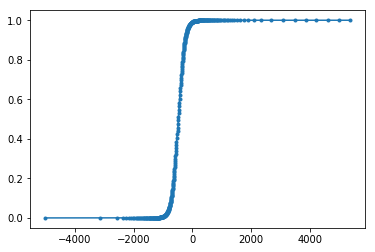

In [19]:
plt.plot(T,sig_sol,'.-')
plt.show()

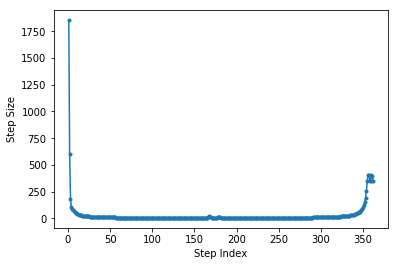

In [20]:
#Plot of Stepindex vs Stepsize
StepSize=[]
for i in range(1,len(T)):
    StepSize=StepSize+[T[i]-T[i-1]]
plt.plot(np.linspace(1,362,361),StepSize,'.-')
plt.xlabel('Step Index')
plt.ylabel('Step Size')
plt.show()

In [21]:
def Explicit_euler(ode_system,y0,tf,h=0.01,t0=0):
    n=int((tf-t0)/h)
    m=len(y0)
    sol=np.zeros([n,m])
    sol[0]=y0
    for i in range(1,n):
        sol[i]=sol[i-1]+h*ode_system(sol[i-1])
    return sol

In [22]:
def Ode(x):
    x1,x2=x
    dx1=-1001*x1+999*x2
    dx2=999*x1-1001*x2
    return np.array([dx1,dx2])

In [23]:
%%time
t0=0
tf=100
h=5
sol=Explicit_euler(Ode,[1,1],tf,h)

CPU times: user 336 µs, sys: 145 µs, total: 481 µs
Wall time: 363 µs


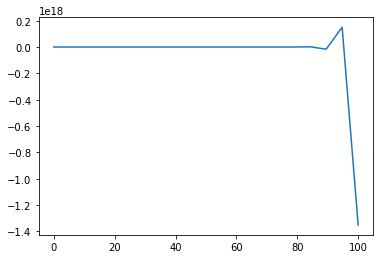

In [24]:
n=int((tf-t0)/h)
T=np.linspace(t0,tf,n)
plt.plot(T,sol[:,0])
plt.show()

In [25]:
def Adams(ode_system,y0,f,tf,h=0.01,t0=0):
    x1=y0+h/12*(23*f[0]-16*f[1]+5*f[2])
    

In [26]:
def PreyP(x):
    x1,x2=x
    dx1=x1-x1*x2
    dx2=-10*x2+x1*x2
    return np.array([dx1,dx2])
def PreyP_odeint(t,x):
    x1,x2=x
    dx1=x1-x1*x2
    dx2=-10*x2+x1*x2
    return np.array([dx1,dx2])

In [27]:
def Adams_Solver(ode_system,f,tf,h=0.01,t0=0):
    n=int((tf-t0)/h)
    m=len(f[0])
    sol=np.zeros([n,m])
    sol[0]=f[0]
    sol[1]=f[1]
    sol[2]=f[2]
    for i in range(3,n):
        sol[i]=sol[i-1]+h/12*(23*ode_system(sol[i-1])-16*ode_system(sol[i-2])+5*ode_system(sol[i-3]))
    return sol

In [28]:
f=np.array([[0.5,1],[0.50023020652423,0.90937363770619],[0.50089337004375,0.82696413439848]])

In [29]:
%%time
t0=0
tf=10
h=0.01
sol=Adams_Solver(PreyP,f,tf,h)

CPU times: user 19.9 ms, sys: 4.17 ms, total: 24.1 ms
Wall time: 20.5 ms


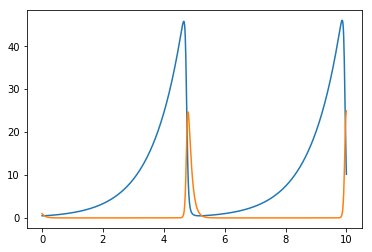

In [30]:
n=int((tf-t0)/h)
T=np.linspace(t0,tf,n)
plt.plot(T,sol[:,0])
plt.plot(T,sol[:,1])
plt.show()

In [31]:
from scipy.integrate import RK45

In [32]:
sol1 =solve_ivp(PreyP_odeint, [0, 10], [0.5,1], RK45)
sol2 =odeint(PreyP_odeint,[0.5,1],T,tfirst=True)

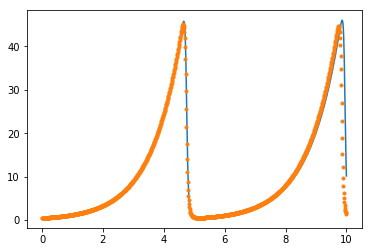

In [33]:
plt.plot(T,sol[:,0])
#plt.plot(T,sol[:,1],)
#plt.plot(sol1.t,sol1.y[0],'--')
#plt.plot(sol1.t,sol1.y[1],'--')
plt.plot(T,sol2[:,0],'.')
#plt.plot(T,sol2[:,1],'.')
plt.show()